In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train_Test_Split

In [ ]:
def train_test_split(df, test_size, ):

  if isinstance(test_size, float):
    test_size = round(test_size * len(df))

  idx = list(df.index)
  test_idx = random.sample(idx, test_size)
  test_df = df.loc[test_idx]
  train_df = df.drop(test_idx)
  return train_df, test_df


In [ ]:
random.seed(0)
train_df, test_df = train_test_split(df, 20)

In [ ]:
data = train_df.values
data[:4]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ]])

### Check purity

In [ ]:
def check_purity(data):
  label_column = data[:, -1]
  unique_classes = np.unique(label_column)
  if len(unique_classes) == 1:
    return True
  else: return False

### Classify data

In [ ]:
def classify_data(data):
  label_column = data[:, -1]
  unique_classes, counts_unique_classes = np.unique(label_column, return_counts = True)
  idx = np.argmax(counts_unique_classes)
  classification = unique_classes[idx]
  return classification

### Potential splits

In [ ]:
def get_pot_splits(data):
  potentiel_splits = {columns_index: pd.Series(np.unique(data[:, columns_index])).rolling(window = 2).mean().iloc[1:].values for columns_index in range(data.shape[1] - 1)}
  return potentiel_splits

### Split data

In [ ]:
def split_data(data, split_column, split_value):
  data_below = data[data[:, split_column] <= split_value]
  data_above = data[data[:, split_column] > split_value]
  return data_below, data_above

In [ ]:
data_below, data_above = split_data(data, 0, 4.3)

### Entropy

In [ ]:
def calculate_entropy(data):
  label_column = data[:, -1]
  _, counts = np.unique(label_column, return_counts = True)
  prob = counts / counts.sum()
  entropy = sum(prob * -np.log2(prob))
  return entropy

def overall_entropy(data_below, data_above):
  n_data = len(data_below) + len(data_above)

  p_data_below = len(data_below) / n_data
  p_data_above = len(data_above) / n_data

  overall_entropy = (p_data_below * calculate_entropy(data_below) + p_data_above * calculate_entropy(data_above))
  return overall_entropy


In [ ]:
def determine_best_split(data, potentiel_splits):
  overall_entropy_ = np.inf
  for column_index in potentiel_splits:
    for value in potentiel_splits[column_index]:
      data_below, data_above = split_data(data, column_index, value)
      current_overall_entropy = overall_entropy(data_below, data_above)

      if current_overall_entropy <= overall_entropy_:
        overall_entropy_ = current_overall_entropy
        best_split_column = column_index
        best_split_value = value
  return best_split_column, best_split_value

### Algorithm

In [ ]:
def decision_tree_algorithm(df, counter = 0, min_samples = 2, max_depth= 5):

  if counter == 0:
    global column_headers
    column_headers = df.columns
    data = df.values
  else:
    data = df

  if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
    classification = classify_data(data)
    return classification

  else:
    counter +=1

    potential_splits = get_pot_splits(data)

    split_column, split_value = determine_best_split(data, potential_splits)
    data_below, data_above = split_data(data, split_column, split_value)

    question = f"{column_headers[split_column]} <= {split_value}"
    sub_tree = {question: []}

    yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
    no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)

    if yes_answer == no_answer:
      sub_tree = yes_answer
    else:
      sub_tree[question].append([yes_answer, no_answer])
    return sub_tree

In [ ]:
pprint(decision_tree_algorithm(train_df, min_samples = 46, max_depth = 5))

{'petal width (cm) <= 0.8': [[0.0, {'petal width (cm) <= 1.65': [[1.0, 2.0]]}]]}


### Built-in Solution

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', min_samples_split = 46, max_depth = 5)

In [ ]:
clf.fit(train_df.drop('target', axis = 1), train_df.target)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=46,
                       random_state=0)

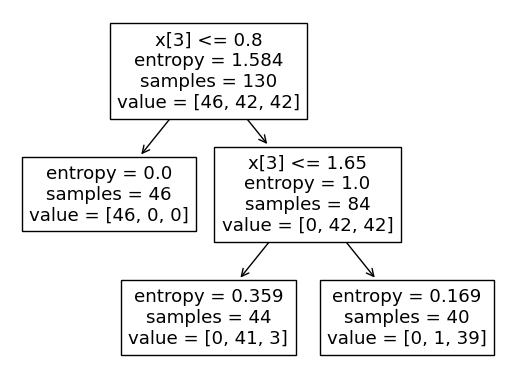

In [ ]:
tree.plot_tree(clf)
plt.show()